# Data Proficiency Project Plan

---

## 1. Project Overview

**Objective:**  
Analyze participant data from the Everything Data mentorship cohort to understand demographics, motivations, skill levels, and factors influencing graduation. Use data-driven insights to recommend improvements for future cohorts.

**Scope:**

- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Predictive modeling for graduation status
- Evaluation of models and actionable recommendations

**Deliverables:**

- Cleaned dataset
- EDA visualizations and summary statistics
- Classification models predicting graduation status
- Model evaluation metrics (accuracy, precision, recall, F1-score)
- Recommendations for program improvement
- README explaining workflow

---

## 2. Project Workflow

### Step 1: Data Acquisition & Inspection

- Load dataset using Python (`pandas`).
- Inspect data types, missing values, and general structure.
- Identify categorical vs. numerical variables.

### Step 2: Data Cleaning & Preprocessing

- Handle missing values (imputation or removal).
- Standardize categorical entries (e.g., gender, country).
- Encode categorical variables (One-Hot Encoding or Label Encoding).
- Convert timestamps into usable features if necessary (e.g., month/year of registration).
- Check for duplicates and inconsistencies.

### Step 3: Exploratory Data Analysis (EDA)

**Demographics Analysis:**

- Age range distribution
- Gender and country breakdown
- Track-wise participant distribution

**Experience & Motivation:**

- Years of learning experience vs. graduation rate
- Hours per week availability vs. performance
- Motivation for joining analysis (word cloud or category frequency)

**Performance Metrics:**

- Distribution of aptitude test completion and total scores
- Correlation matrix between numerical features and graduation status

**Visualizations:**  
Histograms, bar charts, boxplots, heatmaps (Matplotlib/Seaborn).

### Step 4: Predictive Modeling

**Goal:** Predict graduation status.

**Feature Selection:** Experience, hours/week, total score, self-assessed skill level, motivation, etc.

**Models to Compare:**

- Logistic Regression
- Random Forest Classifier (or Gradient Boosting)

- Split data into train/test (e.g., 80/20)
- Train models and tune hyperparameters (if necessary)

### Step 5: Model Evaluation

**Metrics to report:**

- Accuracy
- Precision
- Recall
- F1-score

- Confusion matrix visualization
- Compare models and choose the best-performing one

### Step 6: Insights & Recommendations

- Identify key factors influencing graduation
- Provide actionable recommendations:
  - Ideal participant profile
  - Suggested weekly learning hours
  - Support mechanisms for participants at risk of dropping out
- Present findings with clear visuals and narrative

---

## 3. Timeline

| Task | Start Date | End Date |
| --- | --- | --- |
| Data Inspection & Cleaning | Aug 21 | Aug 23 |
| EDA & Visualization | Aug 24 | Aug 26 |
| Predictive Modeling | Aug 27 | Aug 30 |
| Model Evaluation | Aug 31 | Sep 1 |
| Insights & Recommendations | Sep 2 | Sep 4 |
| Prepare Report & Dashboard | Sep 5 | Sep 11 |
| Submission & Presentation | Sep 12 | Sep 12 |

---

## 4. Tools & Technologies

- Python: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`
- Optional: Jupyter Notebook or Google Colab
- Reporting: PDF/Markdown with visualizations or an interactive dashboard


# Step 1: Data Acquisition & Inspection

In [1]:
# Load dataset
import pandas as pd 
df = pd.read_csv("Cohort 3 DS.csv")

# Shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (63, 15)


In [2]:
# Preview the dataset
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,Timestamp,Id. No,Age range,Gender,Country,Where did you hear about Everything Data?,How many years of learning experience do you have in the field of data?,Which track are you applying for?,How many hours per week can you commit to learning?,What is your main aim for joining the mentorship program?,What is your motivation to join the Everything Data mentorship program?,How best would you describe your skill level in the track you are applying for?,Have you completed the everything data aptitude test for your track?,Total score,Graduated
0,12/1/2024 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


In [3]:
# Check column names and data types
df.dtypes

Timestamp                                                                           object
Id. No                                                                              object
Age range                                                                           object
Gender                                                                              object
Country                                                                             object
Where did you hear about Everything Data?                                           object
How many years of learning experience do you have in the field of data?             object
Which track are you applying for?                                                   object
How many hours per week can you commit to learning?                                 object
What is your main aim for joining the mentorship program?                           object
What is your motivation to join the Everything Data mentorship program?             object

In [4]:
# Summary statistics (numerical only)
df.describe()

,Total score
count,63.000000
mean,69.261905
std,7.238371
min,58.330000
25%,64.000000
50%,67.670000
75%,74.330000
max,83.670000


In [5]:
# inspect unique values for categorical features
categorical_col = df.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()
          )


Unique values in 'Timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

In [6]:
# check for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Timestamp                                                                          0
Id. No                                                                             0
Age range                                                                          0
Gender                                                                             0
Country                                                                            0
Where did you hear about Everything Data?                                          0
How many years of learning experience do you have in the field of data?            0
Which track are you applying for?                                                  0
How many hours per week can you commit to learning?                                0
What is your main aim for joining the mentorship program?                          0
What is your motivation to join the Everything Data mentorship program?            0
How best would you describe your skill level in the track you are

In [7]:
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0


# Step 1 Summary: Data Acquisition & Inspection

- **Dataset Shape:** 63 rows × 15 columns  
- **Data Types:** 14 categorical (`object`), 1 numerical (`float64` → *Total score*)  
- **Preview:** Data contains participant demographics, motivations, and scores.  
- **Numerical Summary (Total Score):**
  - Mean: 69.26
  - Min: 58.33
  - Max: 83.67
  - Std: 7.24
- **Categorical Highlights:**
  - Age Ranges: 18–24, 25–34, 35–44, 45–54
  - Gender: Male, Female
  - Country: Kenya, South Africa
  - Tracks: Data Science, Data Analysis
  - Aptitude Test: Yes/No
  - Graduation Status: Yes/No
- **Missing Values:** 0  
- **Duplicates:** 0  

**Conclusion:** Dataset is complete, clean at the structural level, and ready for **Step 2: Data Cleaning & Preprocessing**.


## Step 2: Data Cleaning & Preprocessing  

In this phase, the dataset will be prepared for analysis and modeling. The main tasks include:  

- Simplifying column names for readability and consistency.  
- Handling missing values through imputation or removal where necessary.  
- Standardizing categorical entries (e.g., gender, country) to avoid inconsistencies.  
- Encoding categorical variables using One-Hot Encoding or Label Encoding.  
- Extracting useful features from timestamps (e.g., deriving the month from registration dates).  
- Checking for and removing duplicates or inconsistent records.  

This step ensures that the dataset is structured, clean, and ready for exploration and modeling in later phases.


In [8]:
df.columns

Index(['Timestamp', 'Id. No', 'Age range', 'Gender', 'Country',
       'Where did you hear about Everything Data?',
       'How many years of learning experience do you have in the field of data?',
       'Which track are you applying for?',
       'How many hours per week can you commit to learning?',
       'What is your main aim for joining the mentorship program?',
       'What is your motivation to join the Everything Data mentorship program?',
       'How best would you describe your skill level in the track you are applying for?',
       'Have you completed the everything data aptitude test for your track?',
       'Total score', 'Graduated'],
      dtype='object')

1) Simplify / Standardize Column Names

In [9]:
raw = df.copy()

In [10]:
rename_map = {
    'Timestamp': 'timestamp',
    'Id. No': 'id',
    'Age range': 'age_range',
    'Gender': 'gender',
    'Country': 'country',
    'Where did you hear about Everything Data?': 'ref_source',
    'How many years of learning experience do you have in the field of data?': 'experience_years',
    'Which track are you applying for?': 'track',
    'How many hours per week can you commit to learning?': 'hours_per_week',
    'What is your main aim for joining the mentorship program?': 'main_aim',
    'What is your motivation to join the Everything Data mentorship program?': 'motivation',
    'How best would you describe your skill level in the track you are applying for?': 'skill_level',
    'Have you completed the everything data aptitude test for your track?': 'aptitude_completed',
    'Total score': 'total_score',
    'Graduated': 'graduated'
}

df2 = raw.rename(columns= rename_map)
df2.columns = [c.strip().lower() for c in df2.columns]
df2.head()


,timestamp,id,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,motivation,skill_level,aptitude_completed,total_score,graduated
0,12/1/2024 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


In [11]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique()
          )


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

2. Basic String Cleaning for Categorical Columns

In [12]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

def clean_str(s):
    if pd.isna(s): 
        return s
    s = str(s).strip()        # remove leading/trailing whitespace
    s = " ".join(s.split())   # replace multiple spaces with a single space
    return s

for c in cat_cols:
    df[c] = df[c].apply(clean_str)


In [13]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

3. Standardize Key Categorical Entries

In [14]:
 # Gender -> {'Male','Female'}
df2["gender"] = df2["gender"].str.title()

# Country -> title case (handles 'Kenya', 'South Africa', etc.)
df2["country"] = df2["country"].str.title()

# Track -> title case but keep canonical forms
df2["track"] = df2["track"].str.title().replace({
    "Data Science": "Data Science",
    "Data Analysis": "Data Analysis",
})

# Age ranges: keep as-is but ensure consistent hyphen and spacing
df2["age_range"] = df2["age_range"].str.replace(r"\s*-\s*", "-", regex=True).str.replace("Years", "years")

# Hours per week -> normalize bucket labels
df2["hours_per_week"] = (
    df2["hours_per_week"]
    .str.lower()
    .replace({
        "less than 6 hours": "<6",
        "7-14 hours": "7-14",
        "more than 14 hours": ">14",
    })
)

# Experience buckets -> normalize labels
df2["experience_years"] = (
    df2["experience_years"]
    .str.lower()
    .replace({
        "less than six months": "<6m",
        "6 months - 1 year": "6m-1y",
        "1-3 years": "1-3y",
        "4-6 years": "4-6y",
    })
)

# # Yes/No binaries -> 1/0
# yes_no_map = {"Yes": 1, "No": 0, "yes": 1, "no": 0}
# df2["aptitude_completed"] = df2["aptitude_completed"].map(yes_no_map).astype("Int64")
# df2["graduated"] = df2["graduated"].map(yes_no_map).astype("Int64")

# Reduce verbose skill levels to simple labels
df2["skill_level"] = df2["skill_level"].replace({
    "Beginner - I have NO learning or work experience in data analysis/ data science": "Beginner",
    "Elementary - I have theoretical understanding of basic data analysis/ data science concepts": "Elementary",
    "Intermediate - I have theoretical knowledge and experience in data analysis/ data science": "Intermediate",
})



In [15]:
print(df2.head())

            timestamp     id    age_range  gender country     ref_source  \
0  12/1/2024 23:50:47  DS301  18-24 years    Male   Kenya  Word of mouth   
1   12/3/2024 9:35:19  DS302  25-34 years    Male   Kenya       WhatsApp   
2  12/3/2024 19:16:49  DS303  18-24 years  Female   Kenya       WhatsApp   
3  12/3/2024 12:52:36  DS304  18-24 years  Female   Kenya       WhatsApp   
4  12/3/2024 18:12:27  DS305  18-24 years    Male   Kenya       WhatsApp   

  experience_years         track hours_per_week main_aim  \
0              <6m  Data Science             <6  Upskill   
1            6m-1y  Data Science            >14  Upskill   
2            6m-1y  Data Science            >14  Upskill   
3            6m-1y  Data Science           7-14  Upskill   
4              <6m  Data Science           7-14  Upskill   

                                          motivation   skill_level  \
0             to enter into the data analysis career      Beginner   
1  To grow and improve my skills in data s

In [16]:
df2.dtypes

timestamp              object
id                     object
age_range              object
gender                 object
country                object
ref_source             object
experience_years       object
track                  object
hours_per_week         object
main_aim               object
motivation             object
skill_level            object
aptitude_completed     object
total_score           float64
graduated              object
dtype: object

In [17]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

In [18]:
numerical = df2.select_dtypes(include= ["int64"]).columns
for col in numerical:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())

4. Timestamp → Month Feature

In [19]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated'],
      dtype='object')

In [20]:
# Parse timestamp (day-first appears unlikely; dataset seems M/D/Y H:M:S)
df2['timestamp'] = pd.to_datetime(df2['timestamp'], errors= 'coerce', infer_datetime_format= True)

# Extract month number and month name
df2["month"] = df2["timestamp"].dt.month
df2["month_name"] = df2["timestamp"].dt.month_name().str[:3]


C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\1438191447.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['timestamp'] = pd.to_datetime(df2['timestamp'], errors= 'coerce', infer_datetime_format= True)


In [21]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name'],
      dtype='object')

In [22]:
df2[["month", "month_name"]].head()

,month,month_name
0,12,Dec
1,12,Dec
2,12,Dec
3,12,Dec
4,12,Dec


In [23]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'id':
['DS301' 'DS302' 'DS303' 'DS304' 'DS305' 'DS306' 'DS307' 'DS308' 'DS309'
 'DS310' 'DS311' 'DS312' 'DS313' 'DS314' 'DS315' 'DS316' 'DS317' 'DS318'
 'DS319' 'DS320' 'DS321' 'DS322' 'DS323' 'DS324' 'DS325' 'DS326' 'DS327'
 'DS328' 'DS329' 'DS330' 'DS331' 'DS332' 'DS333' 'DS334' 'DS335' 'DS336'
 'DS337' 'DS338' 'DS339' 'DS340' 'DS341' 'DS342' 'DS343' 'DS344' 'DS345'
 'DS346' 'DS347' 'DS348' 'DS349' 'DS350' 'DS351' 'DS352' 'DS353' 'DS354'
 'DS355' 'DS356' 'DS357' 'DS358' 'DS359' 'DS360' 'DS361' 'DS362' 'DS363']

Unique values in 'age_range':
['18-24 years' '25-34 years' '45-54 years' '35-44 years']

Unique values in 'gender':
['Male' 'Female']

Unique values in 'country':
['Kenya' 'South Africa']

Unique values in 'ref_source':
['Word of mouth' 'WhatsApp' 'Twitter' 'LinkedIn'
 'through a geeks for geeks webinar' 'Instagram']

Unique values in 'experience_years':
['<6m' '6m-1y' '1-3y' '4-6y']

Unique values in 'track':
['Data Science' 'Data Analysis']

Unique values i

5) Handle Missing Values (Robust Defaults)

In [24]:
df2.isna().sum()

timestamp             0
id                    0
age_range             0
gender                0
country               0
ref_source            0
experience_years      0
track                 0
hours_per_week        0
main_aim              0
motivation            0
skill_level           0
aptitude_completed    0
total_score           0
graduated             0
month                 0
month_name            0
dtype: int64

6) Check Duplicates & Obvious Inconsistencies

In [25]:
# check by full row
df2.duplicated().sum()

0

In [26]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name'],
      dtype='object')

In [27]:
# Duplicates by ID (if ID should be unique)
df2["id"].duplicated().sum()

0

7) Simple text feature from motivation


### Why Engineer a Proxy Feature for `motivation`?

The `motivation` column contains free-text responses, which makes it a **high-cardinality feature** with potentially hundreds or thousands of unique entries. Directly encoding such data (e.g., through one-hot encoding or label encoding) would create a sparse, high-dimensional dataset that is inefficient and may not improve model performance.

To address this, a **proxy feature** is engineered by calculating the **length of each text response**. This simple numeric representation reduces the complexity of the free-text field while still capturing useful information (e.g., longer responses may indicate stronger or more detailed motivations).

This approach ensures:
- **Efficiency**: Converts unstructured text into a single numeric feature.  
- **Interpretability**: Easy to understand and explain in analysis.  
- **Model Performance**: Provides structured input that models can process effectively.  


In [28]:
df2["motivation_len"] = df2["motivation"].fillna("").str.len()
df2["motivation_len"].head()

0     38
1    106
2    196
3     47
4    172
Name: motivation_len, dtype: int64

## Data Cleaning and Preparation

This phase focuses on transforming the raw dataset into a clean, consistent, and analysis-ready form.  
The main goals were to standardize structure, handle missing or inconsistent values, and engineer simple yet meaningful features to improve downstream modeling.

Steps completed:
1. **Simplify / Standardize Column Names** – ensured consistent, machine-friendly naming.  
2. **Basic String Cleaning for Categorical Columns** – removed extra spaces, fixed casing, etc.  
3. **Standardize Key Categorical Entries** – merged duplicates (e.g., variations of the same category).  
4. **Timestamp → Month Feature** – extracted month from dates for seasonality patterns.  
5. **Handle Missing Values (Robust Defaults)** – imputed with sensible defaults.  
6. **Check Duplicates & Obvious Inconsistencies** – removed redundant records.  
7. **Simple Text Feature from `motivation`** – engineered a proxy feature (`text_length`) to capture information from free-text input.  

Steps deferred or discarded:
- **Encode Categorical Variables** – deferred to modeling stage.  


## Exploratory Data Analysis (EDA)

In this phase, the cleaned dataset is explored to uncover patterns, trends, and insights across participant demographics, experience, motivations, and performance metrics.  
The analysis is structured into four areas:

---

### 1. Demographics Analysis
- **Age range distribution**  
- **Gender and country breakdown**  
- **Track-wise participant distribution**  
- **Skill level distribution** (new)  
  - Cross-tab: *Skill Level × Graduation*  
  - Cross-tab: *Age Range × Skill Level*  
- **Month of application distribution** (new)  
  - Cross-tab: *Month × Graduation*  
- **Cross-tabs for deeper insights**:  
  - *Gender × Track* (heatmap)  

---

### 2. Experience & Motivation
- **Years of learning experience vs. graduation rate**  
- **Hours per week availability vs. performance**  
- **Motivation for joining analysis**  
  - Frequency counts / word cloud  
- Cross-tab of *Experience × Skill Level*  

---

### 3. Performance Metrics
- **Distribution of aptitude test completion**  
- **Total score distribution** (boxplots, histograms)  
- **Correlation matrix**: numerical features vs. graduation  

---

### 4. Integrated Cross-Analysis
This section captures cross-variable relationships beyond single-feature distributions:  
- *Skill Level × Graduation* (stacked bar)  
- *Month of Application × Graduation* (stacked bar)  
- *Age Range × Skill Level* (heatmap)  
- *Gender × Track* (heatmap)  

---


In [29]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

# Demographics Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Age Range Distribution

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\1151470220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= 'age_range', palette= 'pastel', order= df2['age_range'].value_counts().index)


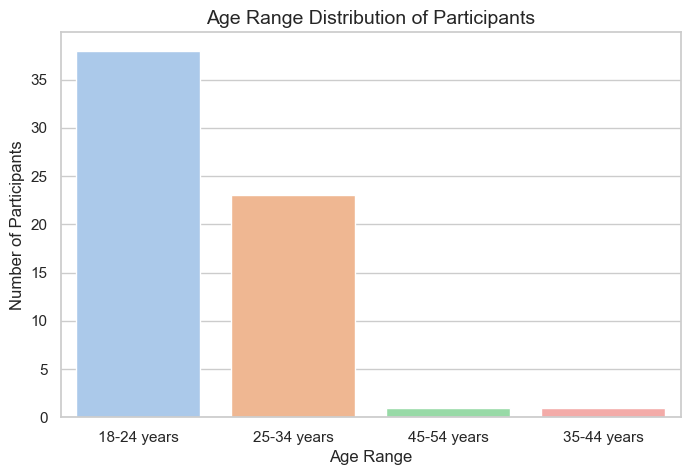

In [31]:
# Age range count plot

plt.figure(figsize= (8,5))
sns.countplot(data= df2, x= 'age_range', palette= 'pastel', order= df2['age_range'].value_counts().index)
plt.title('Age Range Distribution of Participants', fontsize= 14)
plt.xlabel('Age Range')
plt.ylabel('Number of Participants')
plt.show()

In [32]:
df2["age_range"].value_counts()

age_range
18-24 years    38
25-34 years    23
45-54 years     1
35-44 years     1
Name: count, dtype: int64

Majority of the participants are betweeb 18 - 24 years

age_range

18-24 years    38

25-34 years    23

45-54 years     1

35-44 years     1


# Gender Distribution

In [33]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\99370645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='gender', palette='Set2', order=df2['gender'].value_counts().index)


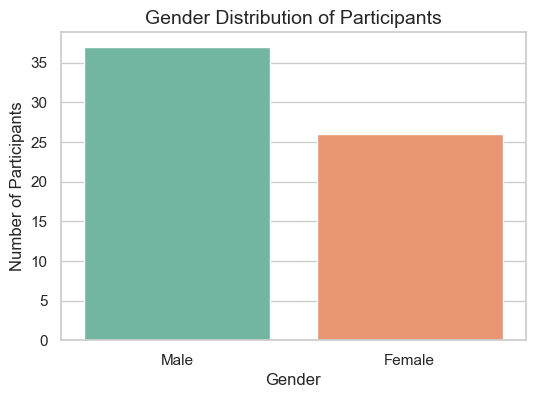

In [34]:
# Gender count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df2, x='gender', palette='Set2', order=df2['gender'].value_counts().index)
plt.title('Gender Distribution of Participants', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show()


In [35]:
df2.gender.value_counts()

gender
Male      37
Female    26
Name: count, dtype: int64

More males than females joined the program with 37 males

# Country Distribution

In [36]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\3925516446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= "country", palette= "Set3", order= df2["country"].value_counts().index)


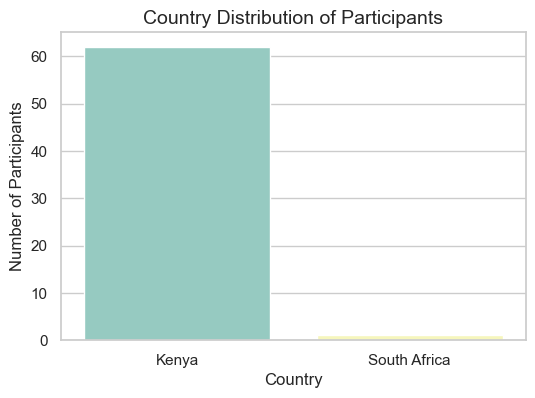

In [37]:
# Country Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(data= df2, x= "country", palette= "Set3", order= df2["country"].value_counts().index)
plt.title("Country Distribution of Participants", fontsize= 14)
plt.xlabel("Country")
plt.ylabel("Number of Participants")
plt.show()

In [38]:
df2.country.value_counts()

country
Kenya           62
South Africa     1
Name: count, dtype: int64

Almost all participants are from Kenya with 62 and 1 from South Africa

# Track Applied For

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\2793836081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= "track", palette= "coolwarm", order= df2["track"].value_counts().index)


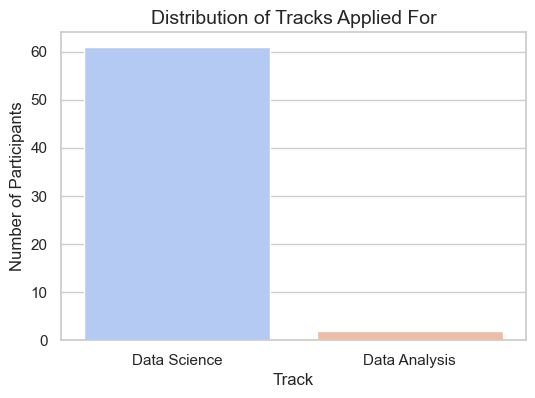

In [39]:
# Track Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data= df2, x= "track", palette= "coolwarm", order= df2["track"].value_counts().index)
plt.title("Distribution of Tracks Applied For", fontsize= 14)
plt.xlabel("Track")
plt.ylabel("Number of Participants")
plt.show()

In [40]:
df2.track.value_counts()

track
Data Science     61
Data Analysis     2
Name: count, dtype: int64

Majority of the applicants applied to the data science track with 61 and 2 in data analysis

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\134437056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "skill_level", data= df2, order= df2["skill_level"].value_counts().index, palette= "Set2")


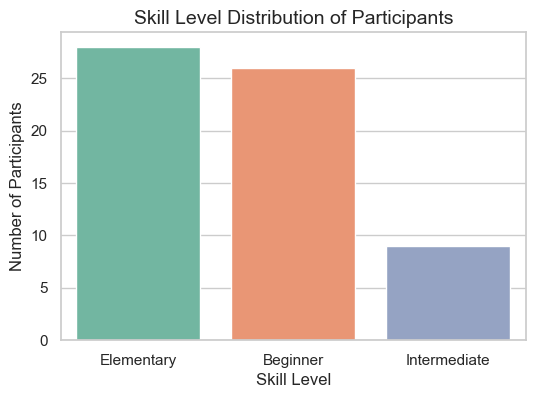

In [41]:
# Skill Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x= "skill_level", data= df2, order= df2["skill_level"].value_counts().index, palette= "Set2")
plt.title("Skill Level Distribution of Participants", fontsize= 14)
plt.xlabel("Skill Level")   #
plt.ylabel("Number of Participants")
plt.show()

In [42]:
df2.skill_level.value_counts()

skill_level
Elementary      28
Beginner        26
Intermediate     9
Name: count, dtype: int64

Participants with elementary skill level were the most with 28 and intermediate with the least at 9

In [43]:
# Cross-tab: Skill Level × Graduation
skill_grad = pd.crosstab(df2['skill_level'], df2['graduated'])
skill_grad

graduated,No,Yes
skill_level,,
Beginner,22,4
Elementary,21,7
Intermediate,5,4


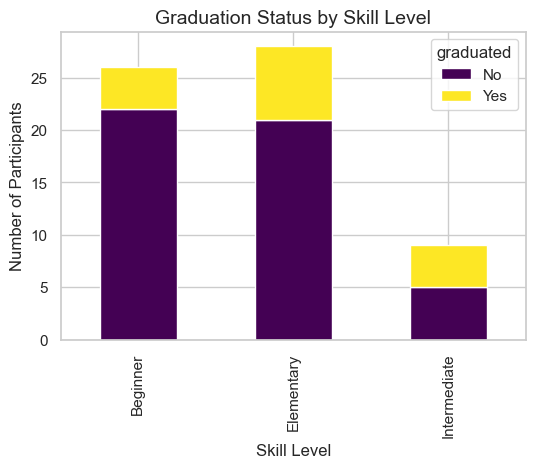

In [44]:
skill_grad.plot(kind="bar", stacked=True, figsize=(6,4), colormap="viridis")
plt.title("Graduation Status by Skill Level", fontsize=14)
plt.xlabel("Skill Level")
plt.ylabel("Number of Participants")
plt.show()

Most participants with beginner level of skills failed to graduate

In [45]:
# Cross-tab: Age Range × Skill Level
age_skill = pd.crosstab(df2['age_range'], df2['skill_level'])
age_skill

skill_level,Beginner,Elementary,Intermediate
age_range,,,
18-24 years,19,14,5
25-34 years,6,13,4
35-44 years,0,1,0
45-54 years,1,0,0


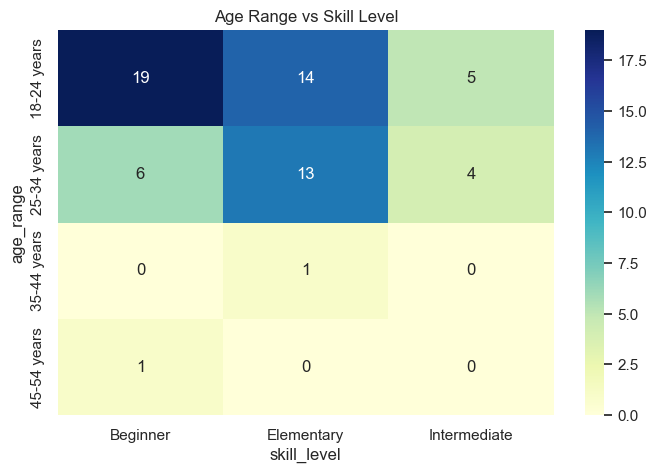

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(age_skill, annot=True, cmap="YlGnBu")
plt.title("Age Range vs Skill Level")
plt.show()

Beginners within the age range of 18-24 years were the majority with 19 participants.

In [47]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\1646934067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="month_name", data=df2, order=df2["month_name"].value_counts().index, palette="Set3")


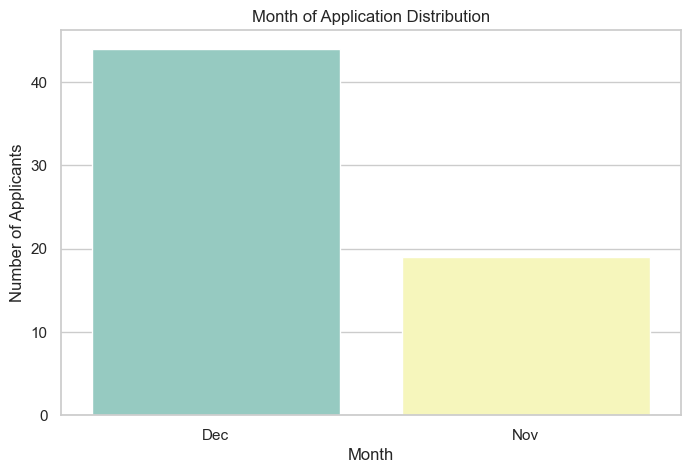

In [48]:
# Month of Application Distribution
plt.figure(figsize=(8,5))
sns.countplot(x="month_name", data=df2, order=df2["month_name"].value_counts().index, palette="Set3")
plt.title("Month of Application Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Applicants")
plt.show()


In [49]:
df2["month_name"].value_counts()

month_name
Dec    44
Nov    19
Name: count, dtype: int64

Majority of the applications were in the month of Decemmber with 44 applicants.

In [50]:
# Cross-tab: Month × Graduation
month_grad = pd.crosstab(df2['month_name'], df2['graduated'])
month_grad

graduated,No,Yes
month_name,,
Dec,35,9
Nov,13,6


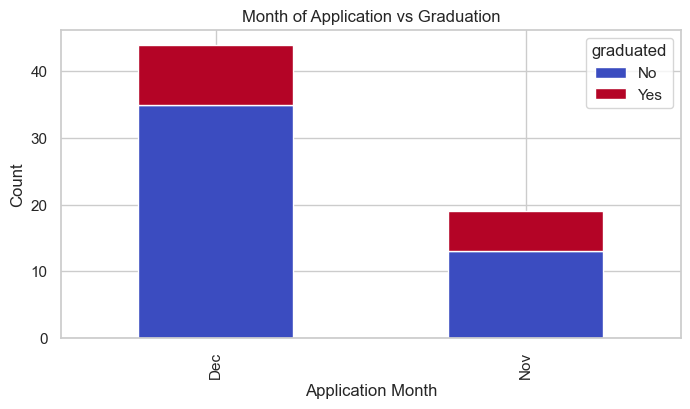

In [51]:
month_grad.plot(kind="bar", stacked=True, figsize=(8,4), colormap="coolwarm")
plt.title("Month of Application vs Graduation")
plt.xlabel("Application Month")
plt.ylabel("Count")
plt.show()

Most of the applicants who made an application in December failed to graduate

In [52]:
# Cross-tab: Gender × Track (Heatmap)
gender_track = pd.crosstab(df2['gender'], df2['track'])
gender_track


track,Data Analysis,Data Science
gender,,
Female,0,26
Male,2,35


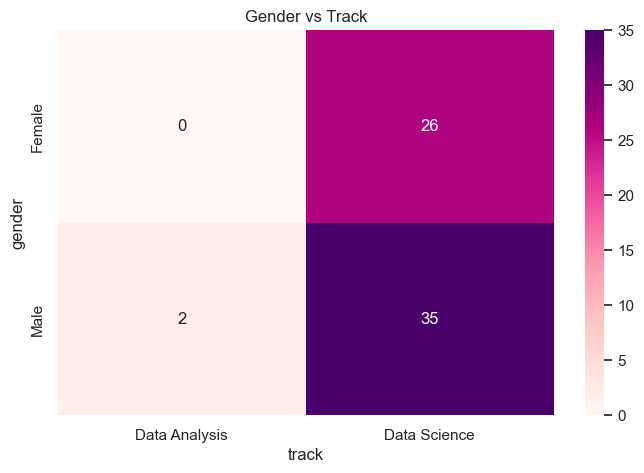

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(gender_track, annot=True, cmap="RdPu")
plt.title("Gender vs Track")
plt.show()

Majority of the the males were in data science with 2 of them in data analysis

## Demographics Analysis – Key Inferences

### 1️⃣ Age Range Distribution
- The majority of participants are **18-24 years old**.  
- Distribution:
  - 18-24 years: 38  
  - 25-34 years: 23  
  - 35-44 years: 1  
  - 45-54 years: 1  

### 2️⃣ Gender Distribution
- More **males** joined the program than females.  
- Distribution:
  - Male: 37  
  - Female: 26  

### 3️⃣ Country Distribution
- Almost all participants are from **Kenya**.  
- Distribution:
  - Kenya: 62  
  - South Africa: 1  

### 4️⃣ Track Applied For
- Most applicants applied to the **Data Science track**.  
- Distribution:
  - Data Science: 61  
  - Data Analysis: 2  

**Inference:**  
The cohort is predominantly **young (18-24 years), male, Kenyan, and primarily interested in the Data Science track**. These trends can guide engagement strategies, content planning, and mentorship resource allocation.


In [54]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

In [55]:
df2.head()

,timestamp,id,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,motivation,skill_level,aptitude_completed,total_score,graduated,month,month_name,motivation_len
0,2024-12-01 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,to enter into the data analysis career,Beginner,Yes,58.67,No,12,Dec,38
1,2024-12-03 09:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,To grow and improve my skills in data science ...,Elementary,Yes,70.00,No,12,Dec,106
2,2024-12-03 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate,Yes,64.33,Yes,12,Dec,196
3,2024-12-03 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,I'd like to upskill and Join the Data Community,Intermediate,Yes,75.00,No,12,Dec,47
4,2024-12-03 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,I aim to join the mentorship program to enhanc...,Beginner,Yes,59.00,No,12,Dec,172


# Experience & Motivation Analysis

In this section, we analyze the participants’ learning experience, time commitment, and motivation for joining the program.  
We also explore the relationship between motivation length (`motivation_len`) and performance to see whether longer or more detailed motivations reflect higher engagement or success rates.

**Key aspects covered:**
- **Years of Experience vs. Graduation Rate**: Checking if prior experience improves the likelihood of graduating.  
- **Hours per Week vs. Performance**: Investigating how time commitment affects the aptitude test score and completion.  
- **Motivation Analysis**:  
  - Frequency distribution of motivation categories.  
  - Word cloud to highlight common themes.  
  - `motivation_len` analysis to understand how the depth of motivation relates to performance and graduation outcomes.


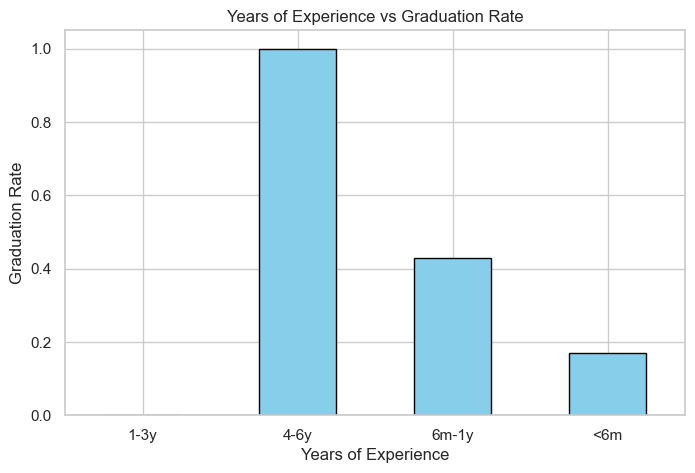

In [56]:
# Years of Experience vs Graduation Rate
# Convert 'graduated' to numeric: 1 for 'Yes', 0 for 'No'
exp_grad = df2.groupby("experience_years")["graduated"].apply(lambda x: (x == "Yes").mean())

plt.figure(figsize=(8,5))
exp_grad.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Years of Experience vs Graduation Rate")
plt.xlabel("Years of Experience")
plt.ylabel("Graduation Rate")
plt.xticks(rotation=0)
plt.show()

Individuals with 4-6 years are most likely to gradutae with those with less than 6 months experience least likely.

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\2003348908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "hours_per_week", y="total_score", data=df2, palette= "Set2")


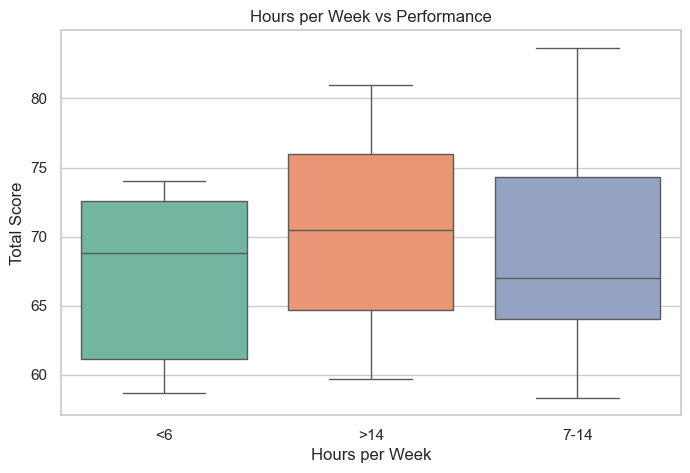

In [57]:
# Hours per Week vs Performance
plt.figure(figsize=(8,5))
sns.boxplot(x= "hours_per_week", y="total_score", data=df2, palette= "Set2")
plt.title("Hours per Week vs Performance")
plt.xlabel("Hours per Week")
plt.ylabel("Total Score")
plt.show()

Individuals who spend more >14 hours per week recorded a highest median total score was compared to 7-14 hours per week who recorded the least median score though it had the greatest outliers

In [58]:
from wordcloud import WordCloud

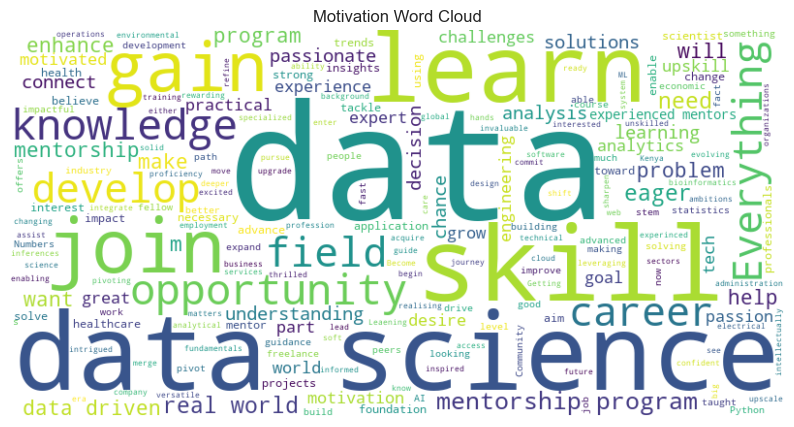

In [59]:
# Motivation Word Cloud
text = " ".join(df2["motivation"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Motivation Word Cloud")
plt.show()

from the graphic, we can see that words such as data, data science, skill, gain, develop, learn, knowledge, opportunity etc are most frequently used in the motivation.

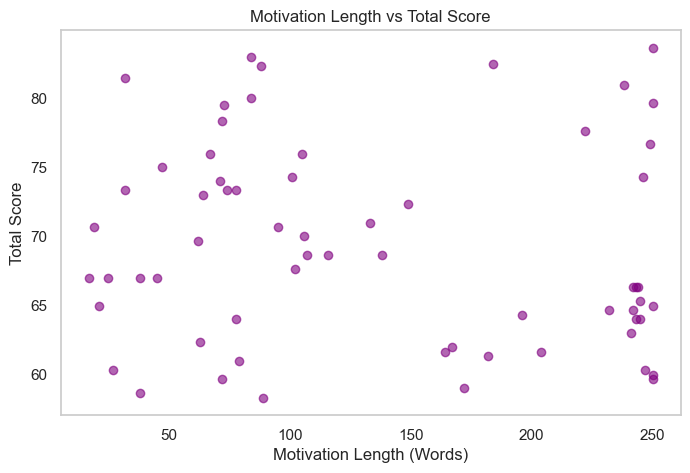

In [60]:
# Motivation Length vs total score
plt.figure(figsize=(8,5))
plt.scatter(df2["motivation_len"], df2["total_score"], alpha=0.6, c= "purple")
plt.title("Motivation Length vs Total Score")
plt.xlabel("Motivation Length (Words)")
plt.ylabel("Total Score")
plt.grid()
plt.show()

There is no discernable relationship observed between the motivation words length and total score.

<Figure size 800x500 with 0 Axes>

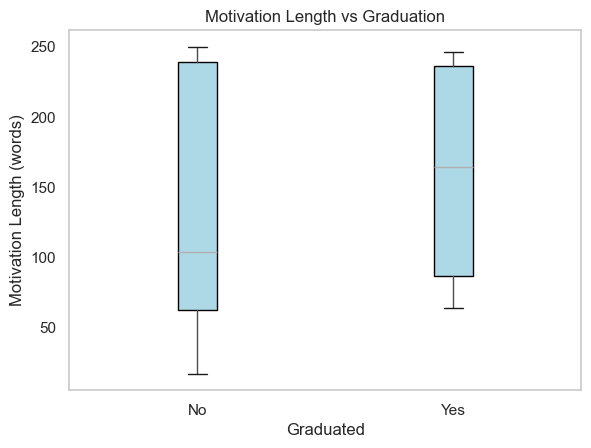

In [61]:
# Motivation Length vs Graduation
plt.figure(figsize= (8, 5))
df2.boxplot(column= "motivation_len", by= "graduated", grid= False, patch_artist= True, boxprops=dict(facecolor="lightblue"))
plt.title('Motivation Length vs Graduation')
plt.suptitle("")  # remove default pandas title
plt.xlabel('Graduated')
plt.ylabel('Motivation Length (words)')
plt.show()

Its is observed that people with a higher median length of words graduated more as compared to those who did not.

In [62]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

In [63]:
# Cross-tab: Experience × Skill Level
exp_skill = pd.crosstab(df2["experience_years"], df2["skill_level"])
exp_skill

skill_level,Beginner,Elementary,Intermediate
experience_years,,,
1-3y,0,3,3
4-6y,0,1,1
6m-1y,0,9,5
<6m,26,15,0


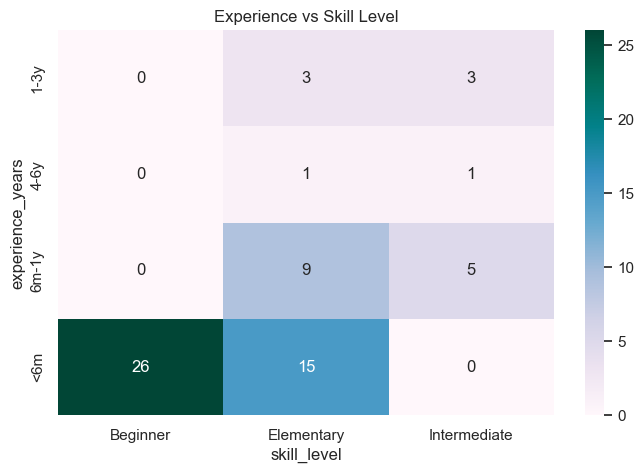

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap(exp_skill, annot=True, cmap="PuBuGn")
plt.title("Experience vs Skill Level")
plt.show()

Beginners with less than 6 month experience and beginner skill set were the majority in the program.

# Conclusion: Experience & Motivation

- **Years of Experience vs. Graduation Rate**:  
  Individuals with 4–6 years of experience are most likely to graduate, while those with less than 6 months of experience are least likely.  

- **Hours per Week vs. Performance**:  
  Learners dedicating more than 14 hours per week achieved the highest median total scores. Those in the 7–14 hours category recorded the lowest median, though with the widest spread of outliers.  

- **Motivation Word Cloud**:  
  Frequently occurring words such as *data, data science, skill, gain, develop, learn, knowledge,* and *opportunity* highlight key drivers for participants joining the program.  

- **Motivation Length vs. Total Score**:  
  No clear relationship was observed between the length of motivation statements and performance scores.  

- **Motivation Length vs. Graduation**:  
  Participants with longer motivation statements showed a higher likelihood of graduating compared to those with shorter statements.  

---
**Overall Insight:**  
Experience level and time commitment significantly impact success, while motivation themes and their depth are more indicative of persistence (graduation) than actual performance outcomes.

## Performance Metrics

**Performance Metrics:**

- Distribution of aptitude test completion and total scores  
- Correlation matrix between numerical features and graduation status  

**Visualizations:**  
- Histograms of aptitude completion and total scores  
- Boxplots comparing total scores by graduation status  
- Bar charts for categorical comparisons  
- Heatmap of correlations between numerical features and graduation status  

In [65]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\478824276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "aptitude_completed", data= df2, palette= "Set1")


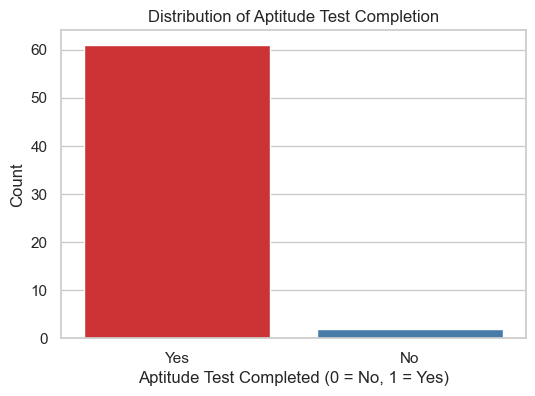

In [66]:
# Distribution of Aptitude Test Completion 
plt.figure(figsize=(6,4))
sns.countplot(x= "aptitude_completed", data= df2, palette= "Set1")
plt.title("Distribution of Aptitude Test Completion")
plt.xlabel("Aptitude Test Completed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [67]:
num_no_aptitude = (df2['aptitude_completed'] == 'No').sum()
num_no_aptitude


2

Only two people failed to complete the aplitude test

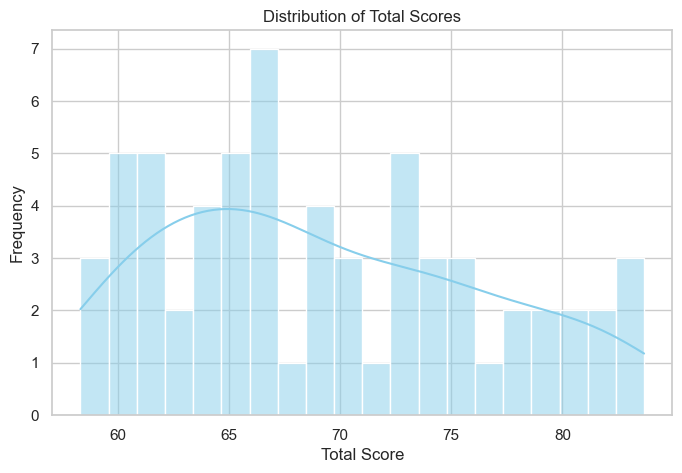

In [68]:
# Distribution of Total Scores
plt.figure(figsize=(8,5))
sns.histplot(df2["total_score"], bins= 20, kde= True, color= "skyblue")
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show() 


In [69]:
df2["total_score"].mode()

0    67.0
Name: total_score, dtype: float64

In [70]:
df2["total_score"].describe()

count    63.000000
mean     69.261905
std       7.238371
min      58.330000
25%      64.000000
50%      67.670000
75%      74.330000
max      83.670000
Name: total_score, dtype: float64

the distribution is right skewed with fewer applicants scoring highly on the aplitude test with a most scoring 67, with the highest having 83.67, lowest 58.33 with a mean of 69.26.

C:\Users\HomePC\AppData\Local\Temp\ipykernel_8608\455418457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "graduated", y= "total_score", data= df2, palette= "Set1")


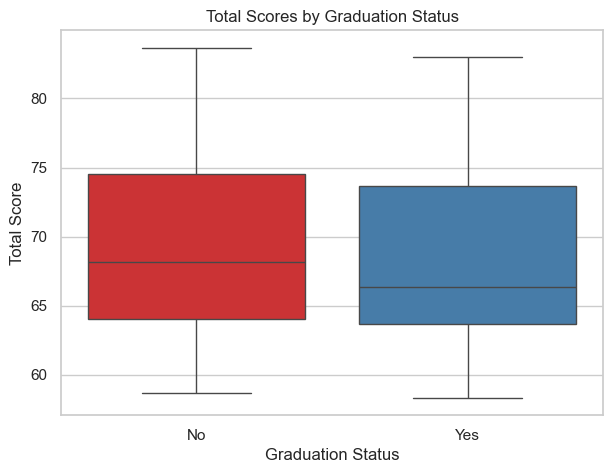

In [71]:
# Boxplot of Total Scores by Graduation Status
plt.figure(figsize=(7,5))
sns.boxplot(x= "graduated", y= "total_score", data= df2, palette= "Set1")
plt.title("Total Scores by Graduation Status")
plt.xlabel("Graduation Status")
plt.ylabel("Total Score")
plt.show()


Individuals who failed to graduate generally had a higher median score in the aplitude score with no outliers noted.

In [72]:
df2.dtypes

timestamp             datetime64[ns]
id                            object
age_range                     object
gender                        object
country                       object
ref_source                    object
experience_years              object
track                         object
hours_per_week                object
main_aim                      object
motivation                    object
skill_level                   object
aptitude_completed            object
total_score                  float64
graduated                     object
month                          int32
month_name                    object
motivation_len                 int64
dtype: object

In [73]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

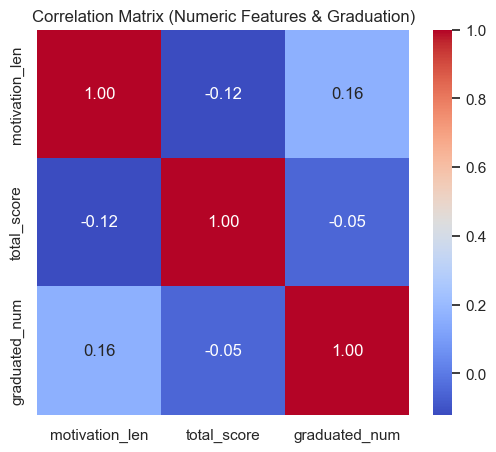

In [74]:
# Convert graduated to numeric (1=Yes, 0=No)
df2['graduated_num'] = df2['graduated'].map({'Yes': 1, 'No': 0})

# Pick only numeric columns for correlation
num_cols = ["motivation_len", "total_score", "graduated_num"]

# Correlation matrix
corr = df2[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features & Graduation)")
plt.show()


### Exploratory Data Analysis (EDA) Insights

**Distribution of Aptitude Test Completion**  
The dataset reveals that almost all participants completed the aptitude test, with only two individuals failing to do so. This indicates that test completion is not a significant distinguishing factor across participants.

**Distribution of Total Scores**  
The distribution of total scores from the aptitude test is right-skewed, suggesting that fewer applicants achieved very high scores. Most participants clustered around a score of 67, with the highest score being 83.67 and the lowest 58.33. The mean score was 69.26, reinforcing that the majority of scores are concentrated below the mean with a long right tail.

**Boxplot of Total Scores by Graduation Status**  
Interestingly, individuals who did not graduate recorded a slightly higher median aptitude score compared to those who did graduate. No outliers were observed within either group. This finding highlights that aptitude test scores alone are not a sufficient predictor of graduation outcomes.

**Deferring Correlation Analysis**  
While a preliminary correlation analysis was conducted using numerical features such as *motivation length*, *total score*, and the binary graduation status, a full correlation study is deferred at this stage. The reason is that several important features in the dataset are categorical (e.g., gender, country, track, experience level). Correlation, in its raw form, is best suited for continuous variables and may yield misleading results when applied directly to categorical data, especially when the target variable is binary (e.g., *graduated: Yes/No*).  

To ensure meaningful insights, categorical features will first be encoded into numerical representations (e.g., one-hot encoding, ordinal encoding, or target encoding where appropriate). Only then will correlation analysis be performed, allowing for a more comprehensive assessment of feature relationships with the graduation outcome.


In [75]:
df2.head()

,timestamp,id,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,motivation,skill_level,aptitude_completed,total_score,graduated,month,month_name,motivation_len,graduated_num
0,2024-12-01 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,to enter into the data analysis career,Beginner,Yes,58.67,No,12,Dec,38,0
1,2024-12-03 09:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,To grow and improve my skills in data science ...,Elementary,Yes,70.00,No,12,Dec,106,0
2,2024-12-03 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate,Yes,64.33,Yes,12,Dec,196,1
3,2024-12-03 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,I'd like to upskill and Join the Data Community,Intermediate,Yes,75.00,No,12,Dec,47,0
4,2024-12-03 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,I aim to join the mentorship program to enhanc...,Beginner,Yes,59.00,No,12,Dec,172,0


In [76]:
def print_unique_values(df):
    object_cols = df.select_dtypes(include= ['object'])
    for col in object_cols.columns:
        print(f"\n Column: {col}")
        print(f"Unique values: {object_cols[col].unique()}")
        print(f"Number of Unique values: {object_cols[col].nunique()}")

print_unique_values(df2)


 Column: id
Unique values: ['DS301' 'DS302' 'DS303' 'DS304' 'DS305' 'DS306' 'DS307' 'DS308' 'DS309'
 'DS310' 'DS311' 'DS312' 'DS313' 'DS314' 'DS315' 'DS316' 'DS317' 'DS318'
 'DS319' 'DS320' 'DS321' 'DS322' 'DS323' 'DS324' 'DS325' 'DS326' 'DS327'
 'DS328' 'DS329' 'DS330' 'DS331' 'DS332' 'DS333' 'DS334' 'DS335' 'DS336'
 'DS337' 'DS338' 'DS339' 'DS340' 'DS341' 'DS342' 'DS343' 'DS344' 'DS345'
 'DS346' 'DS347' 'DS348' 'DS349' 'DS350' 'DS351' 'DS352' 'DS353' 'DS354'
 'DS355' 'DS356' 'DS357' 'DS358' 'DS359' 'DS360' 'DS361' 'DS362' 'DS363']
Number of Unique values: 63

 Column: age_range
Unique values: ['18-24 years' '25-34 years' '45-54 years' '35-44 years']
Number of Unique values: 4

 Column: gender
Unique values: ['Male' 'Female']
Number of Unique values: 2

 Column: country
Unique values: ['Kenya' 'South Africa']
Number of Unique values: 2

 Column: ref_source
Unique values: ['Word of mouth' 'WhatsApp' 'Twitter' 'LinkedIn'
 'through a geeks for geeks webinar' 'Instagram']
Number of Uniqu

In [77]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len', 'graduated_num'],
      dtype='object')

In [78]:
drop_cols = ['timestamp', 'id', 'motivation', 'month_name', 'graduated']
df3 = df2.drop(columns= drop_cols)
df3.head()

,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,skill_level,aptitude_completed,total_score,month,motivation_len,graduated_num
0,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,Beginner,Yes,58.67,12,38,0
1,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Elementary,Yes,70.00,12,106,0
2,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Intermediate,Yes,64.33,12,196,1
3,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,Intermediate,Yes,75.00,12,47,0
4,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,Beginner,Yes,59.00,12,172,0


In [79]:
df3.dtypes

age_range              object
gender                 object
country                object
ref_source             object
experience_years       object
track                  object
hours_per_week         object
main_aim               object
skill_level            object
aptitude_completed     object
total_score           float64
month                   int32
motivation_len          int64
graduated_num           int64
dtype: object

In [80]:
# Print unique values
print_unique_values(df3)



 Column: age_range
Unique values: ['18-24 years' '25-34 years' '45-54 years' '35-44 years']
Number of Unique values: 4

 Column: gender
Unique values: ['Male' 'Female']
Number of Unique values: 2

 Column: country
Unique values: ['Kenya' 'South Africa']
Number of Unique values: 2

 Column: ref_source
Unique values: ['Word of mouth' 'WhatsApp' 'Twitter' 'LinkedIn'
 'through a geeks for geeks webinar' 'Instagram']
Number of Unique values: 6

 Column: experience_years
Unique values: ['<6m' '6m-1y' '1-3y' '4-6y']
Number of Unique values: 4

 Column: track
Unique values: ['Data Science' 'Data Analysis']
Number of Unique values: 2

 Column: hours_per_week
Unique values: ['<6' '>14' '7-14']
Number of Unique values: 3

 Column: main_aim
Unique values: ['Upskill' 'Learn data afresh' 'Connect with fellow data professionals'
 'Build a project portfolio'
 'both upskilling and connecting with fellow data professionals']
Number of Unique values: 5

 Column: skill_level
Unique values: ['Beginner' 'E

### Step 4: Feature Encoding

Now that the dataset is cleaned and simplified, the next step is **encoding categorical variables** into numerical format so they can be used in machine learning models.  
Different categorical columns have different properties:

- **Ordinal categories** (have a natural order) → Ordinal Encoding  
- **Nominal categories** (no natural order, low unique values) → One-Hot Encoding  
- **Binary categories** (exactly two values) → Binary Encoding (0/1)  

Below is the encoding plan for each categorical column:

| Column              | Type        | Unique Values | Encoding Method |
|----------------------|-------------|---------------|-----------------|
| `age_range`          | Ordinal     | 4             | Ordinal Encoding |
| `gender`             | Binary      | 2             | Binary Encoding (Male=0, Female=1) |
| `country`            | Binary      | 2             | Binary Encoding (Kenya=0, SA=1) |
| `ref_source`         | Nominal     | 6             | One-Hot Encoding |
| `experience_years`   | Ordinal     | 4             | Ordinal Encoding |
| `track`              | Binary      | 2             | Binary Encoding (DS=0, DA=1) |
| `hours_per_week`     | Ordinal     | 3             | Ordinal Encoding |
| `main_aim`           | Nominal     | 5             | One-Hot Encoding |
| `skill_level`        | Ordinal     | 3             | Ordinal Encoding (Beginner=0, Elementary=1, Intermediate=2) |
| `aptitude_completed` | Binary      | 2             | Binary Encoding (Yes=1, No=0) |


In [81]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------
# 1. Define column groups
# -------------------------
ordinal_features = {
    "age_range": ["18-24 years", "25-34 years", "35-44 years", "45-54 years"],
    "experience_years": ["<6m", "6m-1y", "1-3y", "4-6y"],
    "hours_per_week": ["<6", "7-14", ">14"],
    "skill_level": ["Beginner", "Elementary", "Intermediate"]  # NEW
}

binary_features = ["gender", "country", "track", "aptitude_completed"]

nominal_features = ["ref_source", "main_aim"]

# -------------------------
# 2. Build transformers
# -------------------------
ordinal_transformer = OrdinalEncoder(
    categories=[
        ordinal_features["age_range"],
        ordinal_features["experience_years"],
        ordinal_features["hours_per_week"],
        ordinal_features["skill_level"],   # NEW
    ]
)

onehot_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# -------------------------
# 3. ColumnTransformer
# -------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", ordinal_transformer, list(ordinal_features.keys())),
        ("onehot", onehot_transformer, nominal_features),
        ("binary", "passthrough", binary_features + ["total_score", "month", "motivation_len", "graduated_num"])
    ]
)

# -------------------------
# 4. Fit and Transform
# -------------------------
df4 = preprocessor.fit_transform(df3)

# Convert back to DataFrame with readable column names
ohe_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_features)
all_cols = list(ordinal_features.keys()) + list(ohe_cols) + binary_features + ["total_score", "month", "motivation_len", "graduated_num"]

df4 = pd.DataFrame(df4, columns=all_cols)

df4.head()


,age_range,experience_years,hours_per_week,skill_level,ref_source_LinkedIn,ref_source_Twitter,ref_source_WhatsApp,ref_source_Word of mouth,ref_source_through a geeks for geeks webinar,main_aim_Connect with fellow data professionals,...,main_aim_Upskill,main_aim_both upskilling and connecting with fellow data professionals,gender,country,track,aptitude_completed,total_score,month,motivation_len,graduated_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,Male,Kenya,Data Science,Yes,58.67,12,38,0
1,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Male,Kenya,Data Science,Yes,70.0,12,106,0
2,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Female,Kenya,Data Science,Yes,64.33,12,196,1
3,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Female,Kenya,Data Science,Yes,75.0,12,47,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Male,Kenya,Data Science,Yes,59.0,12,172,0


In [82]:
# Print unique values
print_unique_values(df3)



 Column: age_range
Unique values: ['18-24 years' '25-34 years' '45-54 years' '35-44 years']
Number of Unique values: 4

 Column: gender
Unique values: ['Male' 'Female']
Number of Unique values: 2

 Column: country
Unique values: ['Kenya' 'South Africa']
Number of Unique values: 2

 Column: ref_source
Unique values: ['Word of mouth' 'WhatsApp' 'Twitter' 'LinkedIn'
 'through a geeks for geeks webinar' 'Instagram']
Number of Unique values: 6

 Column: experience_years
Unique values: ['<6m' '6m-1y' '1-3y' '4-6y']
Number of Unique values: 4

 Column: track
Unique values: ['Data Science' 'Data Analysis']
Number of Unique values: 2

 Column: hours_per_week
Unique values: ['<6' '>14' '7-14']
Number of Unique values: 3

 Column: main_aim
Unique values: ['Upskill' 'Learn data afresh' 'Connect with fellow data professionals'
 'Build a project portfolio'
 'both upskilling and connecting with fellow data professionals']
Number of Unique values: 5

 Column: skill_level
Unique values: ['Beginner' 'E

In [83]:
print_unique_values(df4)


 Column: age_range
Unique values: [0.0 1.0 3.0 2.0]
Number of Unique values: 4

 Column: experience_years
Unique values: [0.0 1.0 2.0 3.0]
Number of Unique values: 4

 Column: hours_per_week
Unique values: [0.0 2.0 1.0]
Number of Unique values: 3

 Column: skill_level
Unique values: [0.0 1.0 2.0]
Number of Unique values: 3

 Column: ref_source_LinkedIn
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: ref_source_Twitter
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: ref_source_WhatsApp
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: ref_source_Word of mouth
Unique values: [1.0 0.0]
Number of Unique values: 2

 Column: ref_source_through a geeks for geeks webinar
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: main_aim_Connect with fellow data professionals
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: main_aim_Learn data afresh
Unique values: [0.0 1.0]
Number of Unique values: 2

 Column: main_aim_Upskill
Unique va

In [84]:
# Binary mappings
df4["gender"] = df4["gender"].map({"Male": 0, "Female": 1})
df4["country"] = df4["country"].map({"Kenya": 0, "South Africa": 1})
df4["track"] = df4["track"].map({"Data Analysis": 0, "Data Science": 1})
df4["aptitude_completed"] = df4["aptitude_completed"].map({"No": 0, "Yes": 1})


In [85]:
df4.head()

,age_range,experience_years,hours_per_week,skill_level,ref_source_LinkedIn,ref_source_Twitter,ref_source_WhatsApp,ref_source_Word of mouth,ref_source_through a geeks for geeks webinar,main_aim_Connect with fellow data professionals,...,main_aim_Upskill,main_aim_both upskilling and connecting with fellow data professionals,gender,country,track,aptitude_completed,total_score,month,motivation_len,graduated_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0,0,1,1,58.67,12,38,0
1,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,0,1,1,70.0,12,106,0
2,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1,0,1,1,64.33,12,196,1
3,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1,0,1,1,75.0,12,47,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,0,1,1,59.0,12,172,0


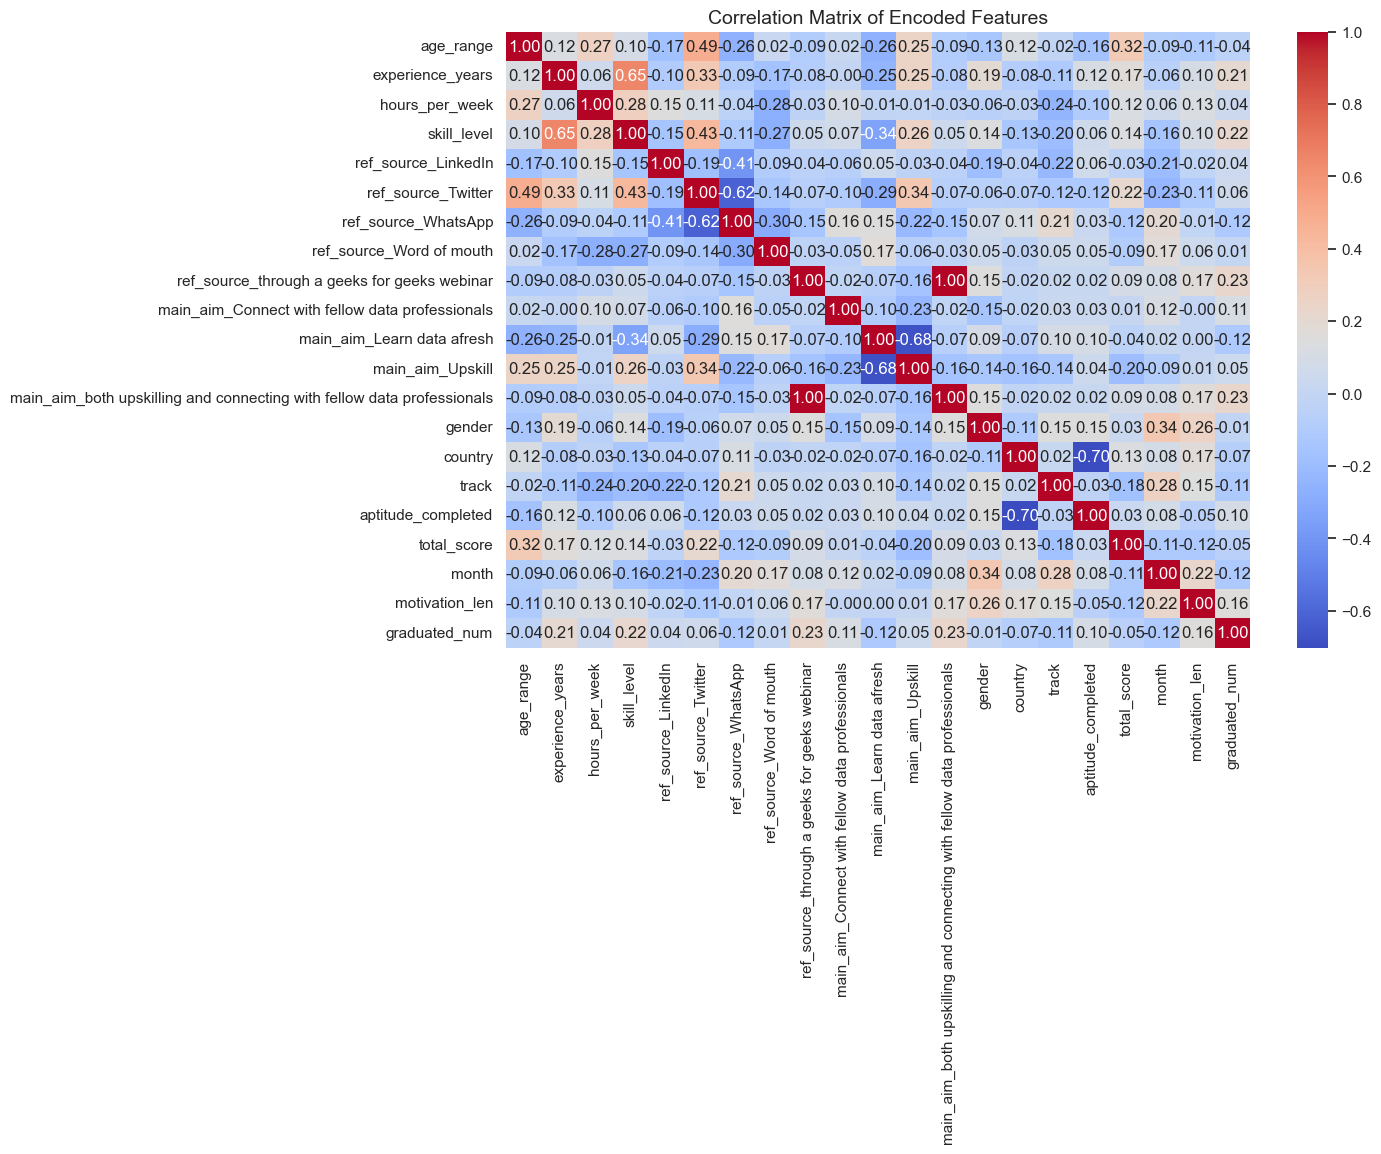

In [86]:
corr = df4.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Encoded Features", fontsize=14)
plt.show()

In [87]:
corr_target = corr["graduated_num"].drop("graduated_num").round(2)
corr_target

age_range                                                                -0.04
experience_years                                                          0.21
hours_per_week                                                            0.04
skill_level                                                               0.22
ref_source_LinkedIn                                                       0.04
ref_source_Twitter                                                        0.06
ref_source_WhatsApp                                                      -0.12
ref_source_Word of mouth                                                  0.01
ref_source_through a geeks for geeks webinar                              0.23
main_aim_Connect with fellow data professionals                           0.11
main_aim_Learn data afresh                                               -0.12
main_aim_Upskill                                                          0.05
main_aim_both upskilling and connecting with fellow 

### Correlation Insights with `graduated_num`

The correlation analysis reveals several meaningful and surprising relationships with graduation outcomes:

- **Strongest positive factors**  
  - `ref_source_through a geeks for geeks webinar` (**0.23**)  
  - `main_aim_both upskilling and connecting with fellow data professionals` (**0.23**)  
  - `skill_level` (**0.22**)  
  These stand out as the most influential features, suggesting that the applicant’s skill level and motivation to both upskill and network, along with the channel of entry, are strong predictors of graduation.

- **Moderate positive factors**  
  - `experience_years` (**0.21**)  
  - `motivation_len` (**0.16**)  
  More experience and longer motivation statements also contribute positively to graduation chances.

- **Weaker positive influences**  
  - `aptitude_completed` (**0.10**)  
  - `main_aim_Connect with fellow data professionals` (**0.11**)  
  Completing the aptitude test and aiming to build connections have mild but noticeable effects.

- **Neutral or negligible effects**  
  - `gender` (-0.01), `country` (-0.07), and `track` (-0.11) show little to no direct correlation, implying these demographic or program attributes do not strongly drive outcomes.

- **Negative associations**  
  - `main_aim_Learn data afresh` (-0.12), `ref_source_WhatsApp` (-0.12), and `month` (-0.12) indicate slightly lower chances of graduation.  
  - `total_score` shows a weak **negative correlation (-0.05)**, which is counterintuitive and may reflect noise or hidden interactions.

### Takeaway
Graduation likelihood appears to be more influenced by **intrinsic factors** (skill level, experience, motivation) and **specific entry pathways/aims**, rather than demographics or raw test scores. The weak or negative role of `total_score` suggests performance is not the sole driver of success, highlighting the importance of motivation, experience, and intent.


## Chi-Square Test of Independence

Before proceeding to predictive modeling, it is important to examine whether categorical features are significantly associated with the target variable (`graduated_num`). The Chi-Square test of independence is used for this purpose, as it evaluates whether the distribution of graduation outcomes is independent of a given categorical variable.

**Hypotheses:**

- **Null Hypothesis (H₀):** The categorical feature and graduation status are independent (no relationship).
- **Alternative Hypothesis (H₁):** The categorical feature and graduation status are not independent (there is a relationship).

By applying this test across categorical variables such as `gender`, `skill_level`, `age_range`, `experience_years`, `track`, `hours_per_week`, and `aptitude_completed`, we can identify which factors show a statistically significant relationship with graduation outcomes. Features with significant associations (p-value < 0.01) may provide useful predictive power in the modeling stage.


In [88]:
df3.head()

,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,skill_level,aptitude_completed,total_score,month,motivation_len,graduated_num
0,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,Beginner,Yes,58.67,12,38,0
1,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Elementary,Yes,70.00,12,106,0
2,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Intermediate,Yes,64.33,12,196,1
3,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,Intermediate,Yes,75.00,12,47,0
4,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,Beginner,Yes,59.00,12,172,0


In [89]:
df2.head()

,timestamp,id,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,motivation,skill_level,aptitude_completed,total_score,graduated,month,month_name,motivation_len,graduated_num
0,2024-12-01 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,to enter into the data analysis career,Beginner,Yes,58.67,No,12,Dec,38,0
1,2024-12-03 09:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,To grow and improve my skills in data science ...,Elementary,Yes,70.00,No,12,Dec,106,0
2,2024-12-03 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate,Yes,64.33,Yes,12,Dec,196,1
3,2024-12-03 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,I'd like to upskill and Join the Data Community,Intermediate,Yes,75.00,No,12,Dec,47,0
4,2024-12-03 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,I aim to join the mentorship program to enhanc...,Beginner,Yes,59.00,No,12,Dec,172,0


In [90]:
df.head()

,Timestamp,Id. No,Age range,Gender,Country,Where did you hear about Everything Data?,How many years of learning experience do you have in the field of data?,Which track are you applying for?,How many hours per week can you commit to learning?,What is your main aim for joining the mentorship program?,What is your motivation to join the Everything Data mentorship program?,How best would you describe your skill level in the track you are applying for?,Have you completed the everything data aptitude test for your track?,Total score,Graduated
0,12/1/2024 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


In [91]:
df5 = df3.copy()
df5["month_name"] = df2["month_name"]
df5["Graduated"] = df["Graduated"]
df5 = df5.drop(columns=["month", "graduated_num"])
df5.head()

,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,skill_level,aptitude_completed,total_score,motivation_len,month_name,Graduated
0,18-24 years,Male,Kenya,Word of mouth,<6m,Data Science,<6,Upskill,Beginner,Yes,58.67,38,Dec,No
1,25-34 years,Male,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Elementary,Yes,70.00,106,Dec,No
2,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,>14,Upskill,Intermediate,Yes,64.33,196,Dec,Yes
3,18-24 years,Female,Kenya,WhatsApp,6m-1y,Data Science,7-14,Upskill,Intermediate,Yes,75.00,47,Dec,No
4,18-24 years,Male,Kenya,WhatsApp,<6m,Data Science,7-14,Upskill,Beginner,Yes,59.00,172,Dec,No


In [92]:
df5.dtypes

age_range              object
gender                 object
country                object
ref_source             object
experience_years       object
track                  object
hours_per_week         object
main_aim               object
skill_level            object
aptitude_completed     object
total_score           float64
motivation_len          int64
month_name             object
Graduated              object
dtype: object

In [93]:
from scipy.stats import chi2_contingency

categorical_cols = [
    "age_range", 
    "gender", 
    "country", 
    "ref_source", 
    "experience_years", 
    "track", 
    "hours_per_week", 
    "main_aim", 
    "skill_level",        
    "aptitude_completed", 
    "month_name"          
]

def chi_square_test(df, col, target="Graduated"):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return {"Feature": col, "Chi2": chi2, "p-value": p, "DoF": dof}

results = []
for col in categorical_cols:
    result = chi_square_test(df5, col)
    results.append(result)

# results to DataFrame
chi2_results = pd.DataFrame(results)
chi2_results

,Feature,Chi2,p-value,DoF
0,age_range,0.691090,0.875298,3
1,gender,0.000000,1.000000,1
2,country,0.000000,1.000000,1
3,ref_source,4.156250,0.527146,5
4,experience_years,12.100610,0.007046,3
5,track,0.001614,0.967957,1
6,hours_per_week,0.260135,0.878036,2
7,main_aim,5.078365,0.279351,4
8,skill_level,3.151683,0.206833,2
9,aptitude_completed,0.000000,1.000000,1


In [94]:
sorted_results = chi2_results.sort_values(by="p-value")
sorted_results

,Feature,Chi2,p-value,DoF
4,experience_years,12.100610,0.007046,3
8,skill_level,3.151683,0.206833,2
7,main_aim,5.078365,0.279351,4
3,ref_source,4.156250,0.527146,5
10,month_name,0.395869,0.529230,1
0,age_range,0.691090,0.875298,3
6,hours_per_week,0.260135,0.878036,2
5,track,0.001614,0.967957,1
1,gender,0.000000,1.000000,1
2,country,0.000000,1.000000,1


### Chi-Square Test Results Interpretation  

| Feature              | χ²       | p-value  | DoF | Interpretation |
|-----------------------|----------|----------|-----|----------------|
| `experience_years`    | 12.10    | 0.007    | 3   | **Significant** → Experience level is strongly associated with graduation. |
| `skill_level`         | 3.15     | 0.207    | 2   | Not significant → Skill level does not meaningfully influence graduation. |
| `main_aim`            | 5.08     | 0.279    | 4   | Not significant → Learners’ main goal is not linked to graduation. |
| `ref_source`          | 4.16     | 0.527    | 5   | Not significant → Source of referral does not affect graduation. |
| `month_name`          | 0.40     | 0.529    | 1   | Not significant → Graduation rates are consistent across months. |
| `age_range`           | 0.69     | 0.875    | 3   | Not significant → Age group does not explain graduation differences. |
| `hours_per_week`      | 0.26     | 0.878    | 2   | Not significant → Study time per week is unrelated to graduation. |
| `track`               | 0.002    | 0.968    | 1   | Not significant → Track choice (Data Science vs Data Analysis) is unrelated. |
| `gender`              | 0.00     | 1.000    | 1   | Not significant → No gender differences in graduation outcomes. |
| `country`             | 0.00     | 1.000    | 1   | Not significant → Country does not affect graduation. |
| `aptitude_completed`  | 0.00     | 1.000    | 1   | Not significant → Completing the aptitude test has no measurable impact. |

---

### **Key Insight**  
- The only categorical variable with a statistically significant relationship to graduation is **`experience_years`** (p < 0.01).  
- All other categorical features — including **skill level, study time, track, gender, country, referral source, and aptitude completion** — show no meaningful association with graduation outcomes.  


### Impact on Predictions  

The Chi-Square test results indicate that **only one categorical variable (`experience_years`) has a statistically significant association with graduation outcomes**.  
Most other categorical variables — including gender, country, track, and referral source — show no strong evidence of association.  

#### What this means for prediction  
- **Not a limitation**: A variable not being statistically significant in a univariate test does not mean it will be useless for prediction.  
  - Machine learning models evaluate *interactions and nonlinear effects* across multiple variables, not just isolated relationships.  
  - Features that appear weak individually can still improve predictive performance when combined with others.  
- **Feature inclusion**: All categorical variables will still be encoded and included in the model training. The model will automatically down-weight irrelevant variables.  
- **Interpretability check**: Post-model analysis (e.g., SHAP values) will help confirm which features truly drive predictions.  



### Conclusion of Hypothesis Test  

Based on the Chi-Square results:  

- For most categorical variables (e.g., gender, country, track, referral source, skill level, main aim, hours per week, aptitude completed, month), the **p-values are greater than 0.05**, so we **fail to reject the null hypothesis (H₀)**. This means these features show no statistically significant relationship with graduation status in isolation.  

- For **experience_years**, the p-value (0.007) is less than 0.05, so we **reject the null hypothesis** and accept the alternative (H₁). This indicates a significant association between years of experience and graduation status.  

**Overall:**  
Only `experience_years` demonstrates a statistically significant relationship with graduation. All other categorical features appear independent of graduation when tested individually.  


In [95]:
df4.head()

,age_range,experience_years,hours_per_week,skill_level,ref_source_LinkedIn,ref_source_Twitter,ref_source_WhatsApp,ref_source_Word of mouth,ref_source_through a geeks for geeks webinar,main_aim_Connect with fellow data professionals,...,main_aim_Upskill,main_aim_both upskilling and connecting with fellow data professionals,gender,country,track,aptitude_completed,total_score,month,motivation_len,graduated_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0,0,1,1,58.67,12,38,0
1,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,0,1,1,70.0,12,106,0
2,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1,0,1,1,64.33,12,196,1
3,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1,0,1,1,75.0,12,47,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0,0,1,1,59.0,12,172,0


### Train-Test Split

We split the dataset into **training** and **testing** sets to evaluate model performance on unseen data.  
A stratified split is applied to ensure the graduation outcome (`graduated_num`) maintains its class balance across both sets.


In [96]:
df4.dtypes

age_range                                                                 object
experience_years                                                          object
hours_per_week                                                            object
skill_level                                                               object
ref_source_LinkedIn                                                       object
ref_source_Twitter                                                        object
ref_source_WhatsApp                                                       object
ref_source_Word of mouth                                                  object
ref_source_through a geeks for geeks webinar                              object
main_aim_Connect with fellow data professionals                           object
main_aim_Learn data afresh                                                object
main_aim_Upskill                                                          object
main_aim_both upskilling and

In [97]:


# Convert all object columns to numeric
df6 = df4.apply(
    lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col
)

df6.isna().sum()

age_range                                                                 0
experience_years                                                          0
hours_per_week                                                            0
skill_level                                                               0
ref_source_LinkedIn                                                       0
ref_source_Twitter                                                        0
ref_source_WhatsApp                                                       0
ref_source_Word of mouth                                                  0
ref_source_through a geeks for geeks webinar                              0
main_aim_Connect with fellow data professionals                           0
main_aim_Learn data afresh                                                0
main_aim_Upskill                                                          0
main_aim_both upskilling and connecting with fellow data professionals    0
gender      

In [98]:
from sklearn.model_selection import train_test_split

# pick X and y
X = df6.drop(columns=["graduated_num"])
y = df6["graduated_num"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Check the shape of splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 20), (13, 20), (50,), (13,))

In [99]:
y_train.value_counts(), y_test.value_counts()

(graduated_num
 0    38
 1    12
 Name: count, dtype: int64,
 graduated_num
 0    10
 1     3
 Name: count, dtype: int64)

In [100]:
df6.dtypes

age_range                                                                 float64
experience_years                                                          float64
hours_per_week                                                            float64
skill_level                                                               float64
ref_source_LinkedIn                                                       float64
ref_source_Twitter                                                        float64
ref_source_WhatsApp                                                       float64
ref_source_Word of mouth                                                  float64
ref_source_through a geeks for geeks webinar                              float64
main_aim_Connect with fellow data professionals                           float64
main_aim_Learn data afresh                                                float64
main_aim_Upskill                                                          float64
main_aim_both up

In [101]:
y_train.head()

32    1
28    0
16    1
2     1
9     0
Name: graduated_num, dtype: int64

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [104]:
actual_v_pred = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
actual_v_pred.head()

,Actual,Predicted
22,0,0
49,1,0
18,0,0
8,0,0
36,0,0


In [105]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 3,  0]], dtype=int64)

In [106]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.00      0.00      0.00         3

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13



c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Predictive Modeling — Classifier Selection & Hyperparameter Tuning

In this step, we transition from Exploratory Data Analysis (EDA) to building **predictive models**.  
Since the target variable (`graduated_num`) is categorical, we apply **classification algorithms** rather than regression.

We will test and tune three different classifiers using **GridSearchCV** with cross-validation:

1. **Logistic Regression**  
 
2. **Support Vector Machine (SVM)**  

3. **XGBoost Classifier**  
   
The performance metric used for model comparison is **Accuracy**, and the best configuration for each classifier will be stored in `gridsearch_classifiers_results.csv`.

This step sets the foundation for selecting the **best-performing classifier** to predict student graduation outcomes.


In [107]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier  
import numpy as np

In [108]:


def find_best_classifier(X_train, y_train):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': np.logspace(-4, 4, 20),
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [500, 1000, 2000]
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }
        },
        'xgboost_classifier': {
            'model': XGBClassifier(),
            'params': {
                'n_estimators': [50, 100],
                'min_child_weight': [1, 5, 10],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.6, 0.8, 1.0],
                'gamma': [0.5, 1],
                'eval_metric': ['logloss', 'mlogloss']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring="accuracy", return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    results_df.to_csv("gridsearch_classifiers_results.csv", index=False)
    return results_df


In [109]:
import warnings
warnings.filterwarnings("ignore")


In [110]:
find_best_classifier(X_train, y_train)

,model,best_score,best_params
0,logistic_regression,0.74,"{'C': 0.0001, 'max_iter': 500, 'penalty': 'l1'..."
1,svm,0.74,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
2,xgboost_classifier,0.74,"{'eval_metric': 'logloss', 'gamma': 0.5, 'lear..."


### ✅ Classifier Tuning Results

After running **GridSearchCV** on the three candidate classifiers, the following best configurations were obtained:

| Model                | Best CV Score | Best Parameters |
|-----------------------|---------------|-----------------|
| Logistic Regression   | **0.74**      | `{'C': 0.0001, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}` |
| SVM (Support Vector)  | **0.74**      | `{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}` |
| XGBoost Classifier    | **0.74**      | `{'eval_metric': 'logloss', 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.6}` |

---

### 🔎 Interpretation
- All three models achieved a **cross-validation accuracy of 0.74**, meaning none clearly outperformed the others.  
- **Logistic Regression** used strong regularization (`C=0.0001`) with an L1 penalty, suggesting many features may not add much predictive power.  
- **SVM** with a linear kernel also performed similarly, indicating the decision boundary between graduates and non-graduates might be roughly linear.  
- **XGBoost** tuned with shallow trees (`max_depth=3`, `n_estimators=50`) matched the same score, suggesting limited complex interactions in the data.

---

### 📌 Next Step
Since all models are tied in performance:
- We can proceed to **final evaluation on the test set** (accuracy, precision, recall, F1-score, confusion matrix).  
- If performance remains similar, we may prioritize **Logistic Regression** (for interpretability) or **XGBoost** (for feature importance insights).


### Model Evaluation — Logistic Regression

We evaluate the tuned Logistic Regression model on the test set using multiple classification metrics:
- **Accuracy**: Overall proportion of correct predictions.  
- **Precision**: Of those predicted positive, how many were actually positive.  
- **Recall**: Of all actual positives, how many were correctly predicted.  
- **F1-score**: Harmonic mean of precision and recall.  
- **Confusion Matrix**: Breakdown of True/False Positives/Negatives.  


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [112]:
log_reg = LogisticRegression(C=0.0001, max_iter= 500, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
comp.head()

,Actual,Predicted
22,0,0
49,1,0
18,0,0
8,0,0
36,0,0


In [113]:
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Evaluation
Accuracy: 0.7692307692307693
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.00      0.00      0.00         3

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13


Confusion Matrix:
 [[10  0]
 [ 3  0]]


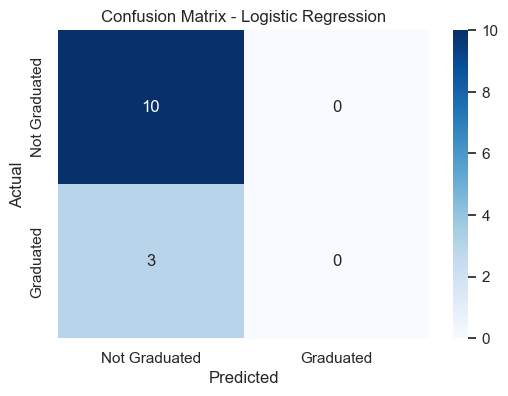

In [114]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= ["Not Graduated", "Graduated"], yticklabels= ["Not Graduated", "Graduated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

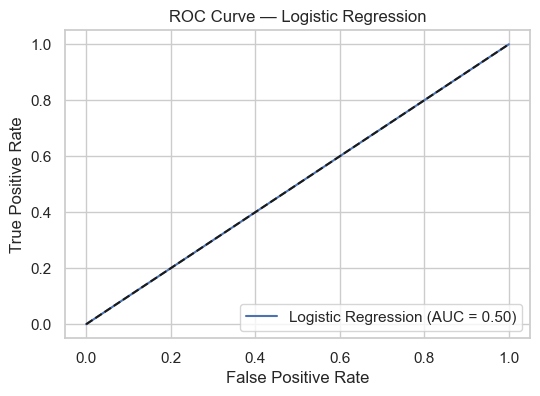

In [115]:
# Predicted probabilities for the positive class
y_prob_logreg = log_reg.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
auc_score = roc_auc_score(y_test, y_prob_logreg)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Interpreting the ROC Curve

The image displays a Receiver Operating Characteristic (ROC) curve for a logistic regression model. An ROC curve is a graph used to evaluate the performance of a classification model at all classification thresholds.

The x-axis represents the False Positive Rate (or Fall-Out), which is the proportion of negative cases that were incorrectly classified as positive.

The y-axis represents the True Positive Rate (or Recall), which is the proportion of positive cases that were correctly classified.

The key to interpreting this specific plot is the AUC (Area Under the Curve) value, which is 0.50.

An AUC score of 0.50 means the model has no discriminative ability whatsoever. The curve follows the diagonal line from the bottom-left corner to the top-right corner, which represents a classifier that performs no better than a random guess (like a coin flip). A perfect classifier would have an AUC of 1.0, with its curve passing through the top-left corner.

In conclusion, the logistic regression model shown in the chart is completely ineffective at predicting the target variable.

###  Logistic Regression Evaluation Summary

The logistic regression model achieved an accuracy of **76.9%**, but its performance on the minority class was poor. Precision, recall, and F1-score for the positive class (1) were **0.0**, indicating that the model completely failed to identify any positive cases. The confusion matrix further confirms this, as all positives were misclassified as negatives.

The ROC AUC score of **0.50** shows that the model has no discriminative ability and performs no better than random guessing. This is also reflected in the ROC curve, which follows the diagonal line.

**Conclusion:** Logistic regression is not a suitable model for this dataset, as it fails to capture the positive class and does not provide meaningful predictive power.


### Model Evaluation — XGBoost Classifier

We evaluate the tuned XGBoost Classifier model on the test set using multiple classification metrics:
- **Accuracy**: Overall proportion of correct predictions.  
- **Precision**: Of those predicted positive, how many were actually positive.  
- **Recall**: Of all actual positives, how many were correctly predicted.  
- **F1-score**: Harmonic mean of precision and recall.  
- **Confusion Matrix**: Breakdown of True/False Positives/Negatives.  


In [116]:
xgb = XGBClassifier(eval_metric='logloss', gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
comp.head()

,Actual,Predicted
22,0,0
49,1,0
18,0,0
8,0,0
36,0,0


In [117]:
print("XGBoost Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Evaluation
Accuracy: 0.7692307692307693
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.00      0.00      0.00         3

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13


Confusion Matrix:
 [[10  0]
 [ 3  0]]


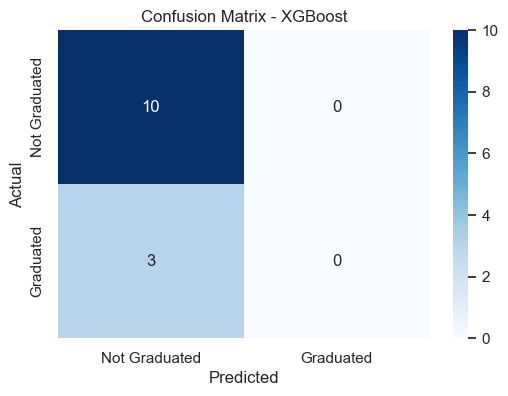

In [118]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= ["Not Graduated", "Graduated"], yticklabels= ["Not Graduated", "Graduated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

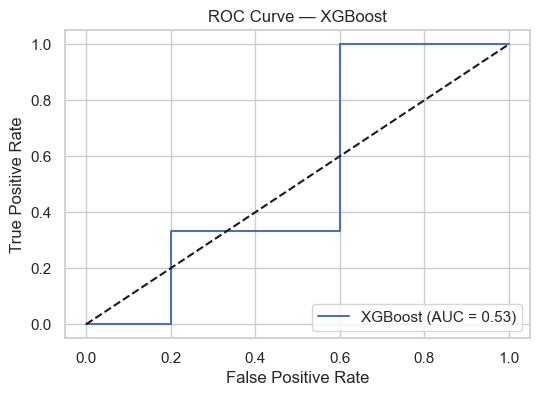

In [119]:
# Predicted probabilities for the positive class
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
auc_score = roc_auc_score(y_test, y_prob_xgb)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — XGBoost')
plt.legend(loc='lower right')
plt.show() 

The ROC curve for the XGBoost model shows that it is a weak classifier, 0.53, performing only slightly better than a random guess.



## 🧮 XGBoost Evaluation Summary

- **Accuracy:** 0.77  
- **Precision:** 0.00  
- **Recall:** 0.00  
- **F1 Score:** 0.00  
- **ROC AUC Score:** 0.53  

### 📊 Classification Report
| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| 0     | 0.77       | 1.00   | 0.87     | 10      |
| 1     | 0.00       | 0.00   | 0.00     | 3       |

**Overall Accuracy:** 0.77  
**Macro Avg:** Precision 0.38, Recall 0.50, F1 0.43  
**Weighted Avg:** Precision 0.59, Recall 0.77, F1 0.67  

### 🔢 Confusion Matrix
[[10 0]

[ 3 0]]


### 📈 Interpretation
- The model predicts **class 0 correctly in all cases** but fails entirely to identify **class 1**, resulting in precision, recall, and F1-score of 0 for the minority class.  
- The **ROC AUC score of 0.53** indicates the model performs **only marginally better than random guessing**, showing weak discriminative ability.  
- Despite achieving a reasonable overall accuracy (0.77), this is misleading because the model is biased towards the majority class.  

👉 **Conclusion:** XGBoost is not effective in this setup. It fails to capture signals from the minority class, limiting its usefulness as a classifier here.


### Model Evaluation — SVM Classifier

We evaluate the tuned SVM Classifier model on the test set using multiple classification metrics:
- **Accuracy**: Overall proportion of correct predictions.  
- **Precision**: Of those predicted positive, how many were actually positive.  
- **Recall**: Of all actual positives, how many were correctly predicted.  
- **F1-score**: Harmonic mean of precision and recall.  
- **Confusion Matrix**: Breakdown of True/False Positives/Negatives.  


In [120]:
svm = SVC(C=0.1, gamma='scale', kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
comp.head()

,Actual,Predicted
22,0,0
49,1,0
18,0,0
8,0,0
36,0,0


In [121]:
print("SVM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Evaluation
Accuracy: 0.7692307692307693
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.00      0.00      0.00         3

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13


Confusion Matrix:
 [[10  0]
 [ 3  0]]


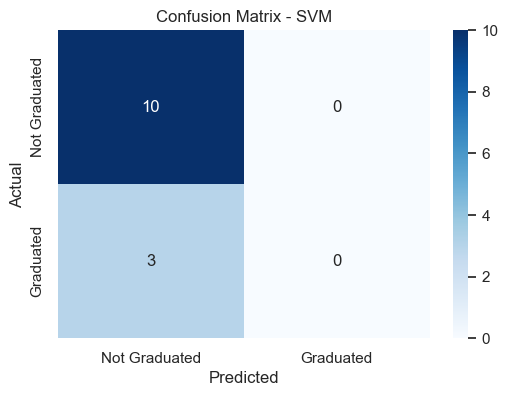

In [122]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= ["Not Graduated", "Graduated"], yticklabels= ["Not Graduated", "Graduated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

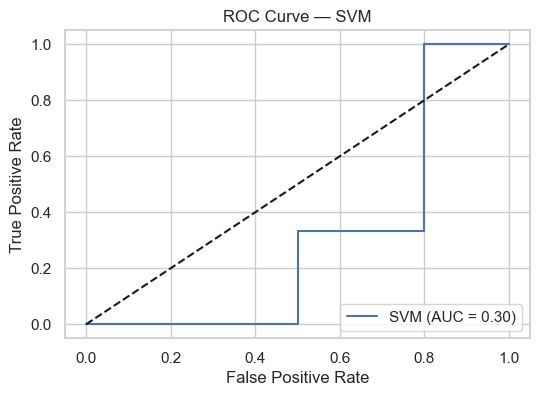

In [125]:
# SVC with linear kernel does not support predict_proba by default.
# Use decision_function for ROC curve instead.

y_score_svm = svm.decision_function(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score_svm)
auc_score = roc_auc_score(y_test, y_score_svm)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — SVM')
plt.legend(loc='lower right')
plt.show()

An AUC of 0.30 shows that the model is a very poor classifier. It is not only ineffective but also actively hurting performance by consistently making incorrect classifications.

## 🧮 SVM Evaluation Summary

- **Accuracy:** 0.77  
- **Precision:** 0.00  
- **Recall:** 0.00  
- **F1 Score:** 0.00  
- **ROC AUC Score:** 0.30  

### 📊 Classification Report
| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| 0     | 0.77       | 1.00   | 0.87     | 10      |
| 1     | 0.00       | 0.00   | 0.00     | 3       |

**Overall Accuracy:** 0.77  
**Macro Avg:** Precision 0.38, Recall 0.50, F1 0.43  
**Weighted Avg:** Precision 0.59, Recall 0.77, F1 0.67  

### 🔢 Confusion Matrix
[[10 0]

[ 3 0]]


### 📈 Interpretation
- The model predicts **all class 0 instances correctly** but **completely misses class 1**, yielding zero performance metrics for the minority class.  
- The **ROC AUC score of 0.30** is worse than random guessing (0.50), suggesting the classifier is not only ineffective but also making systematically poor predictions.  
- While accuracy looks acceptable at 0.77, this is **highly misleading** because it comes from ignoring the minority class.  

👉 **Conclusion:** SVM in this configuration is **a poor classifier** for this dataset. It introduces more harm than good by failing to generalize beyond the majority class.


## ✅ Final Model Selection

When comparing the three models — **Logistic Regression**, **XGBoost**, and **SVM** — all achieved the same overall accuracy of **0.77**. However, accuracy alone is misleading because the models completely failed to capture the minority class (class 1).

The key differentiator here is the **ROC AUC Score**, which measures the model’s ability to separate the classes across thresholds:

- Logistic Regression: **0.50** → no discriminative power (random guess).  
- XGBoost: **0.53** → slightly better than random, showing minimal separation ability.  
- SVM: **0.30** → worse than random, actively misclassifying.  

### 🏆 Best Model
**XGBoost** emerges as the "best" among the three, but only marginally so, with an ROC AUC score of **0.53**. This still indicates a very weak classifier that is only barely better than chance.  

### 🚨 Takeaway
- None of the models demonstrate strong predictive performance.  
- Class imbalance (few positive cases) is likely driving the poor results.  
- Further work is needed, such as:
  - Collecting more balanced data.  
  - Applying **resampling techniques** (SMOTE, undersampling, oversampling).  

👉 **Conclusion:** While **XGBoost** is technically the best performer, all three models are **unsuitable for deployment in their current state**. Improvements in data handling and modeling strategy are essential before relying on these results.
